In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Generate simple data 
X = np.arange(2,20,0.2)
Y = 0.1*np.square(X) +  8*np.sin(2*X/3) + 0.8*np.random.randn(len(X))

                       
                        


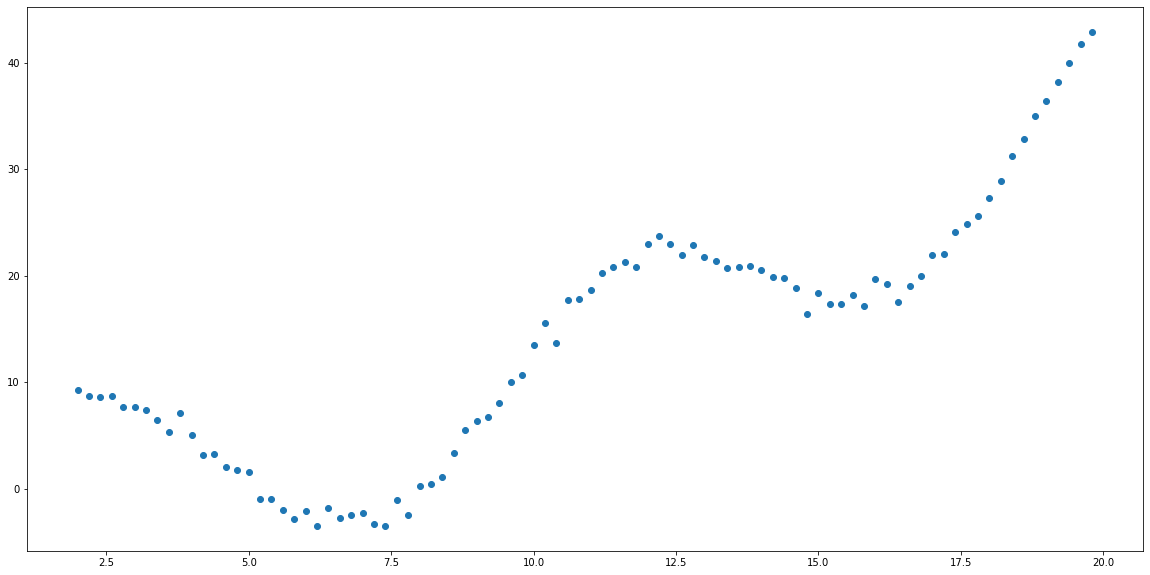

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(X,Y)

In [6]:
import bayesmodels

In [7]:
model = bayesmodels.BGPModel(inputs=X, outputs=Y)

In [8]:
mcmc_samples = 4000
num_burnin_steps = 5000
num_adaptation_steps = 4000
adaptation_rate = 0.40
init_step_size = [0.05, 0.10,0.02]
num_leapfrog_steps = 3
thinning = 3


model.run_mcmc(mcmc_samples, num_burnin_steps, num_adaptation_steps,
              adaptation_rate, init_step_size, num_leapfrog_steps,thinning)

Average acceptance ratio:  0.9844694


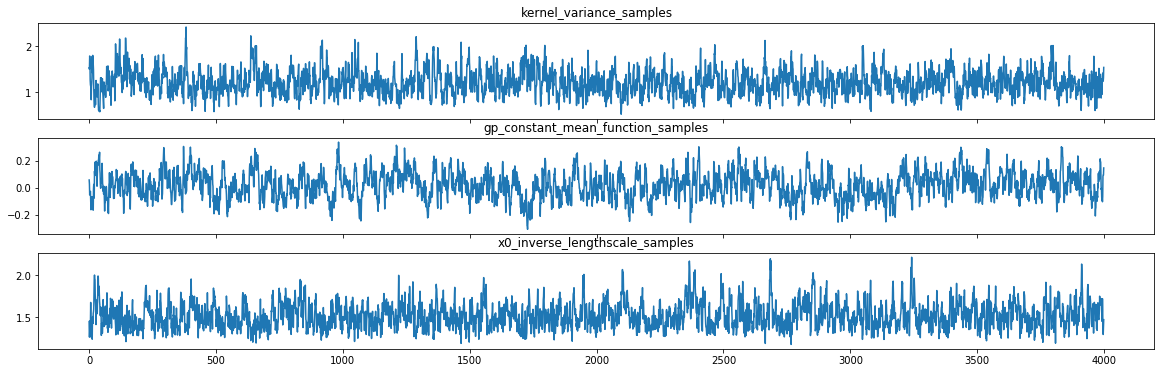

In [9]:
model.plot_chains(display = True, save_plot = False, directory_path = None)

In [10]:
# Inference 
mean_pos, std_pos = model.get_predictions(X, fast = True)

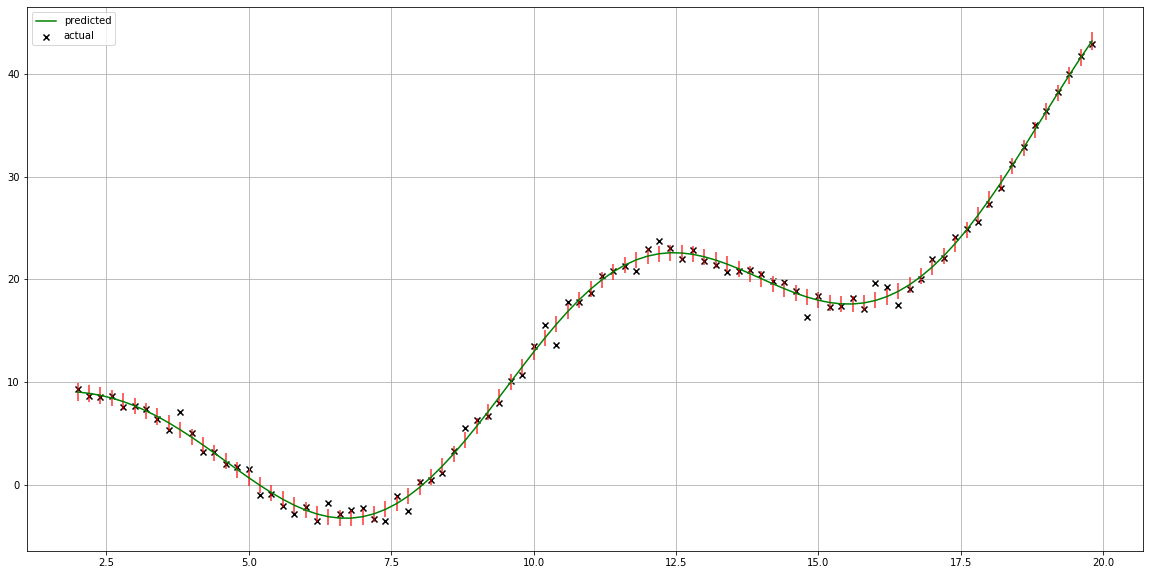

In [11]:
plt.figure(figsize =(20,10))
plt.scatter(X, Y,marker='x', color = 'black', label = 'actual')
plt.plot(X, mean_pos, color = 'green', label = 'predicted')
plt.vlines(X, mean_pos -2*std_pos,  mean_pos + 2*std_pos, color = 'red', alpha = 0.8)
plt.grid()
plt.legend()


In [12]:
# Inference 
mean_pos, std_pos = model.get_predictions(X, fast = False)

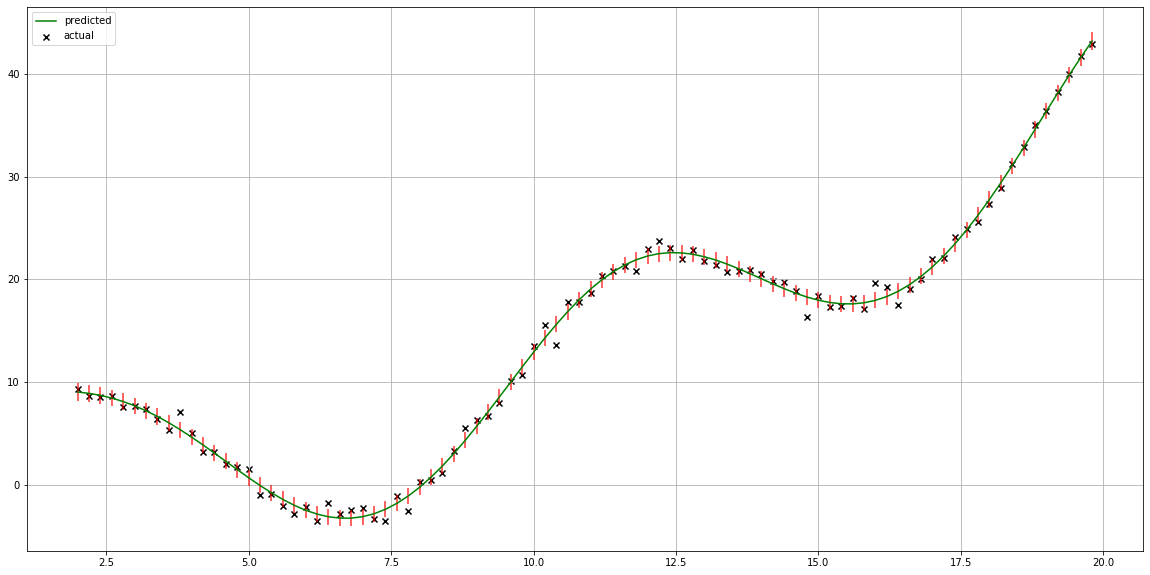

In [13]:
plt.figure(figsize =(20,10))
plt.scatter(X, Y,marker='x', color = 'black', label = 'actual')
plt.plot(X, mean_pos, color = 'green', label = 'predicted')
plt.vlines(X, mean_pos -2*std_pos,  mean_pos + 2*std_pos, color = 'red', alpha = 0.8)
plt.grid()
plt.legend()